# AMR slice animation with YT

Module import

In [1]:
import os
import sys
import time
import yt
import dispatch.yt
import numpy as np

Optionally, turn of YT info lines

In [2]:
yt.funcs.mylog.setLevel(40)

Data directory, run directory, and data source field

In [3]:
data='../data'
run='amr_7'
fld='density'


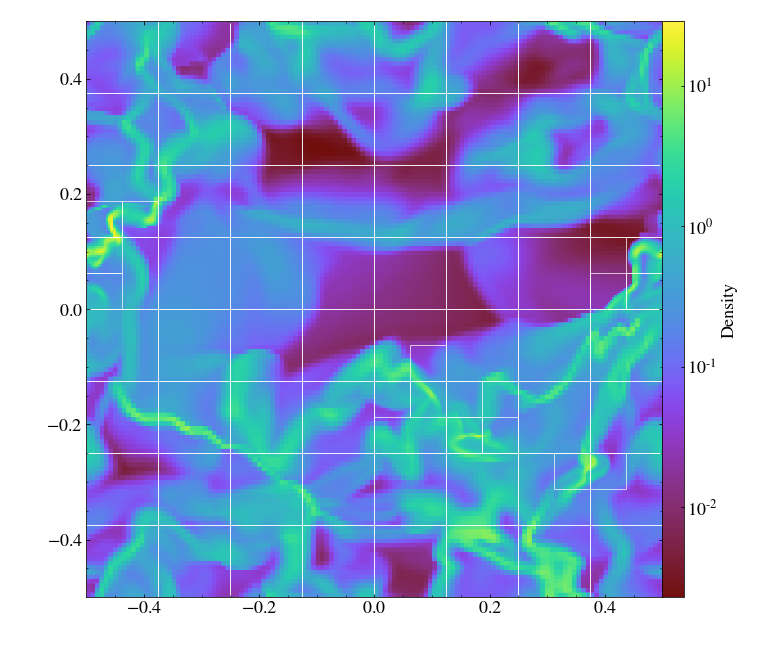

In [4]:
z=0.6
ds=dispatch.yt.snapshot(30,run,data)
slc=yt.SlicePlot(ds,axis=2,fields=fld,center=[.5,.5,z])
slc.set_log(fld,True)
slc.set_colorbar_label(fld,"Density")
slc.set_xlabel("")
slc.set_ylabel("")
slc.annotate_grids(edgecolors="white")
slc.show()

Make a sub-directory for images

In [5]:
os.makedirs(data+'/'+run+'/im',exist_ok=True)

Loop over a number of timesteps, producing images for an animation:

In [6]:
z=0.6                                                       # slice plane
i0=5                                                        # 1st snapshot
i1=50                                                       # last snapshot
im=(i0-5)*2+1                                               # first frame number
for i in range(i0,i1+1):
    ds=dispatch.yt.snapshot(i,run,'../data')                # data source
    slc=yt.SlicePlot(ds,axis=2,fields=fld,center=[.5,.5,z]) # slice it
    slc.set_log(fld,True)                                   # use log density
    slc.set_colorbar_label(fld,"Density")                   # replace label on colbar
    slc.set_xlabel(""); slc.set_ylabel("")                  # blank out x- and y-labels
    slc.annotate_grids(edgecolors="white")                  # color of grid annotation
    for j in (0,1):                                         # double frames
        file='{}/{}/im/{:03d}.png'.format(data,run,im)      # .png file
        sys.stdout.write('{:03d}'.format(im))               # progress
        c='\n' if im%20 == 0 else ' '                       # new line or not
        sys.stdout.write(c)
        im+=1
        slc.save(file)

001 002 003 004 005 006 007 008 009 010 011 012 013 014 015 016 017 018 019 020
021 022 023 024 025 026 027 028 029 030 031 032 033 034 035 036 037 038 039 040
041 042 043 044 045 046 047 048 049 050 051 052 053 054 055 056 057 058 059 060
061 062 063 064 065 066 067 068 069 070 071 072 073 074 075 076 077 078 079 080
081 082 083 084 085 086 087 088 089 090 091 092 